### Exploratory Data Analysis (EDA)

In [29]:
### IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
### load the dataset

df = pd.read_csv("Pharma_Industry.csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
df.shape

(500, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [6]:
### statistical summary

df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [7]:
### finding any null values

df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [8]:
### finding duplicated rows

df.duplicated().sum()

np.int64(0)

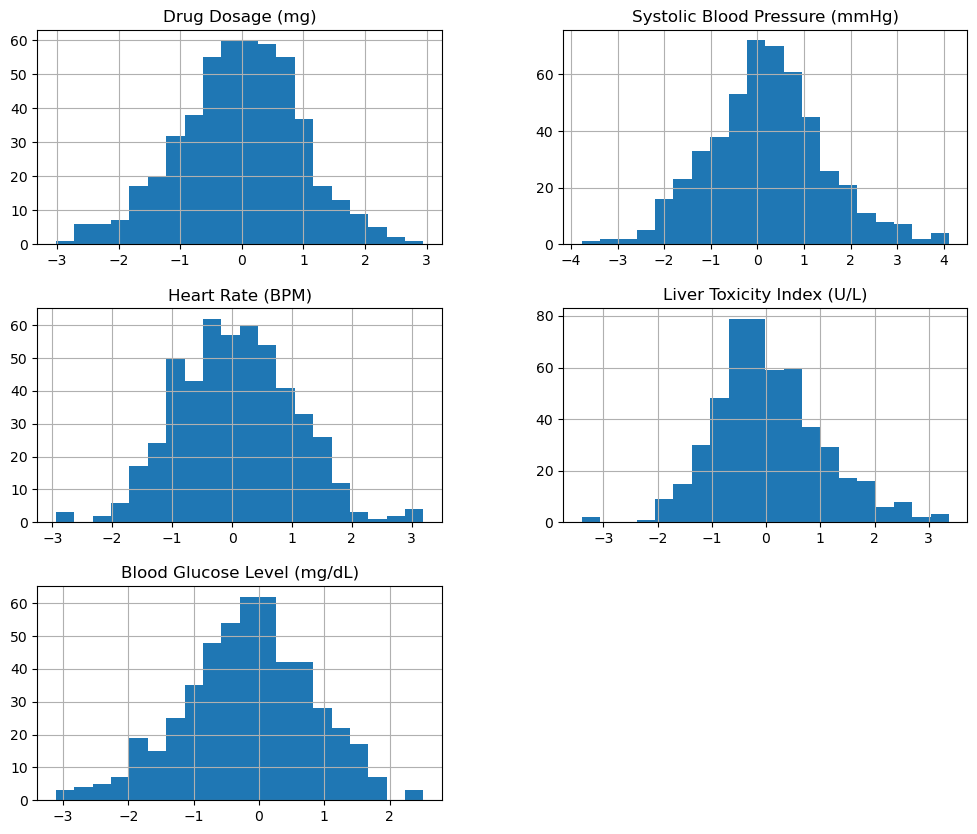

In [14]:
# Histograms to understand feature distributions [cite: 38]

df.drop('Drug Response', axis=1).hist(bins=20, figsize=(12, 10))
plt.show()

<Axes: >

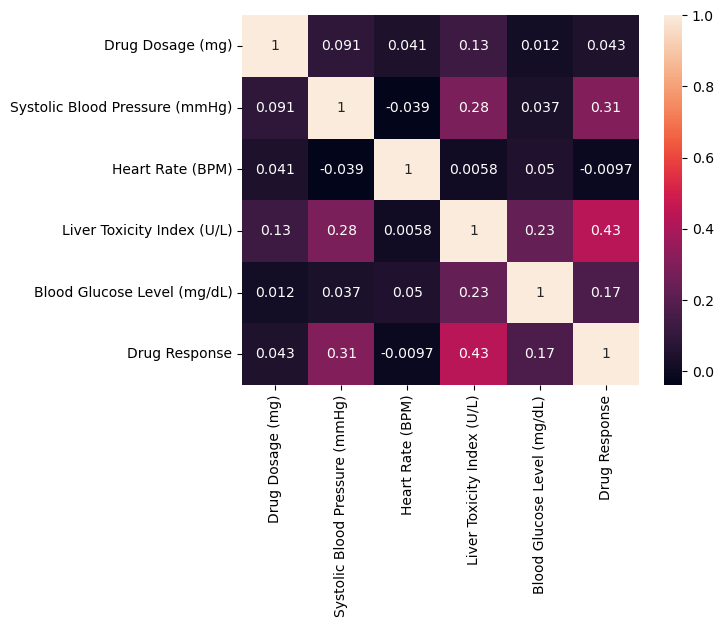

In [16]:
### correlation matrix

corr = df.corr()
sns.heatmap(corr,annot=True)

### Data Preprocessing

In [17]:
### splitting into feature and target

In [56]:
feature = df.drop(columns="Drug Response")
target = df["Drug Response"]

In [22]:
### splitting into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,train_size=0.8,random_state=50,stratify=target)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 5)
(100, 5)
(400,)
(100,)


### Data Visualiztion

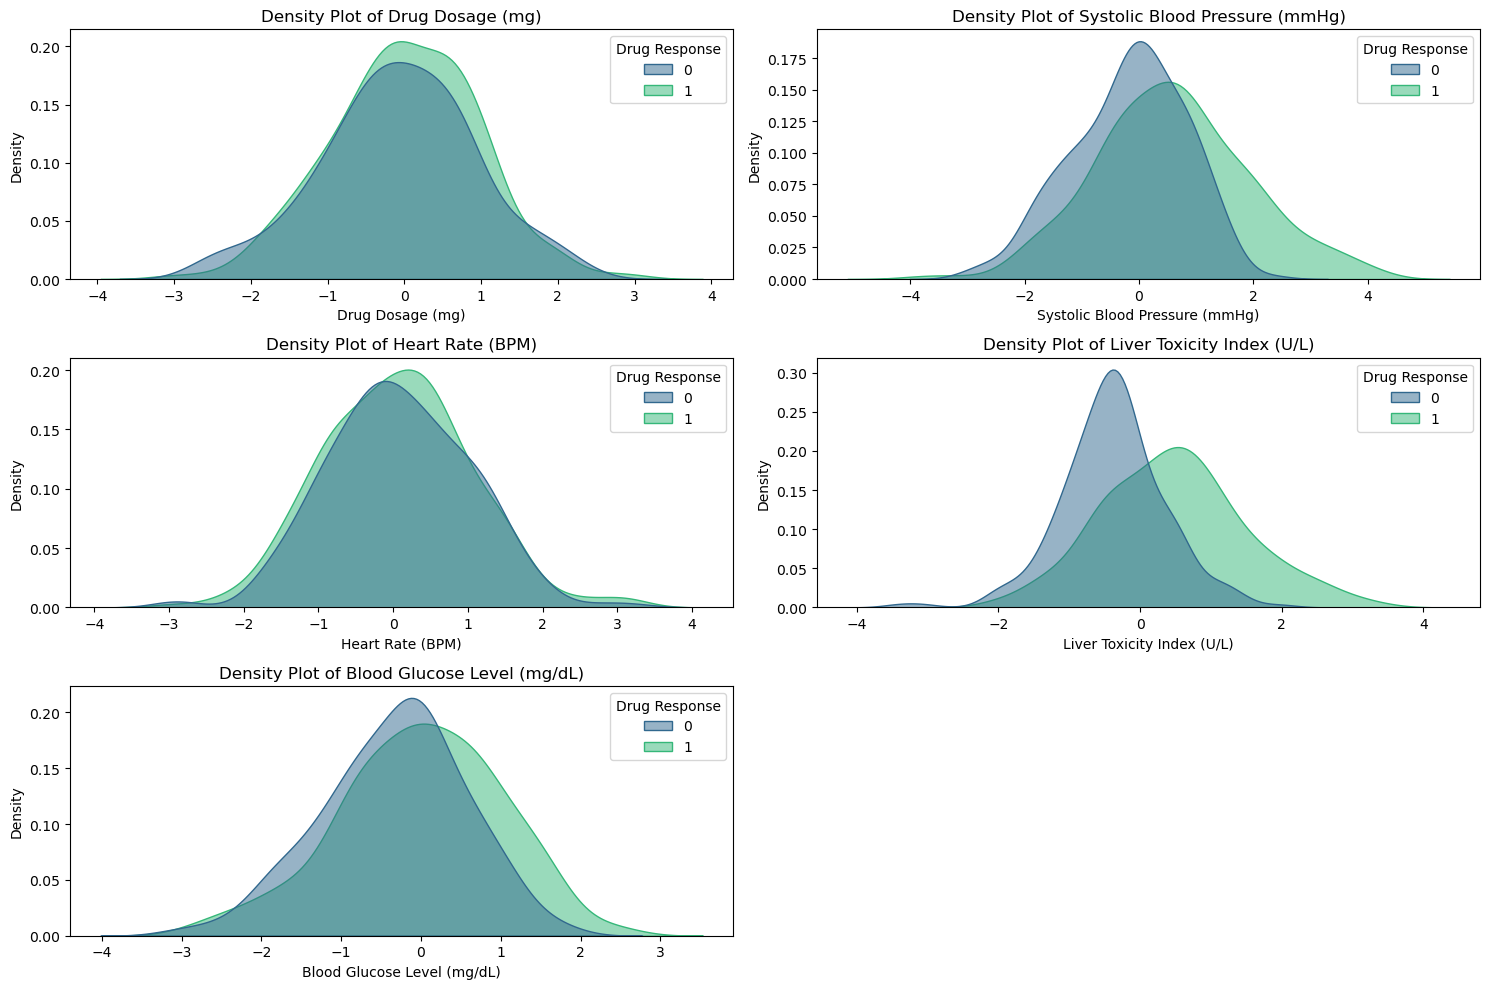

In [26]:
# Set up the figure for density plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=df, x=col, hue='Drug Response', fill=True, palette='viridis', alpha=0.5)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()

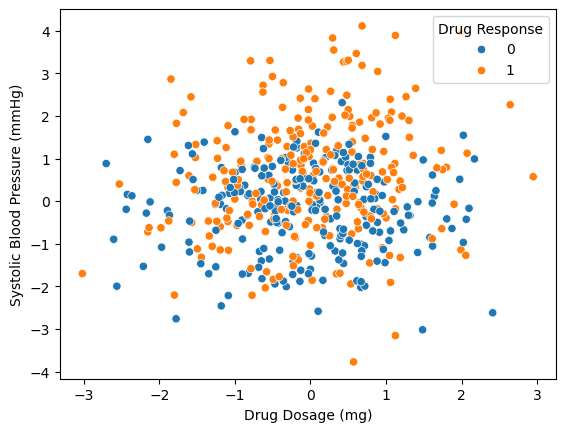

In [33]:
sns.scatterplot(data=df,x="Drug Dosage (mg)",y="Systolic Blood Pressure (mmHg)",hue=df["Drug Response"])
plt.show()

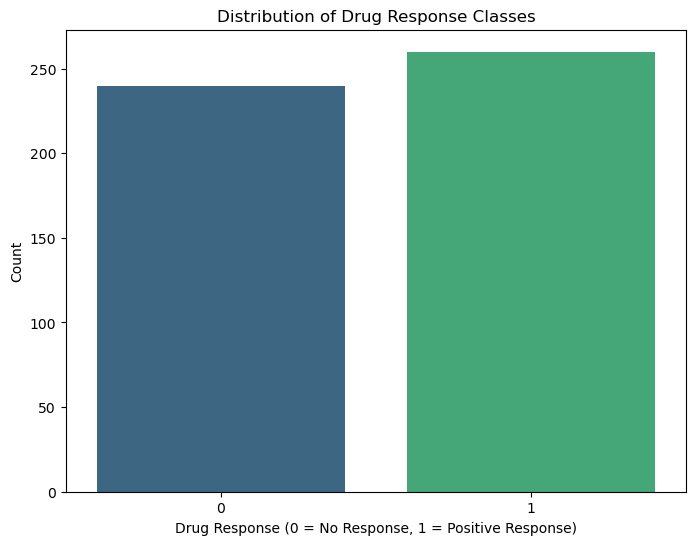

In [31]:
### Visualize class distributions to gauge dataset balance or imbalance.

plt.figure(figsize=(8, 6))
sns.countplot(x='Drug Response', data=df, palette='viridis')

# Add labels and title
plt.title('Distribution of Drug Response Classes')
plt.xlabel('Drug Response (0 = No Response, 1 = Positive Response)')
plt.ylabel('Count');

In [28]:
### there is no significant class imbalance

### SVM Implementation

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

In [34]:
### using rbf kernel

svc=SVC(C=1,kernel="rbf")
svc.fit(x_train,y_train)

SVC(C=1)

In [38]:
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8
0.7962962962962963
0.8113207547169812
0.8269230769230769


### Visualization of SVM Results

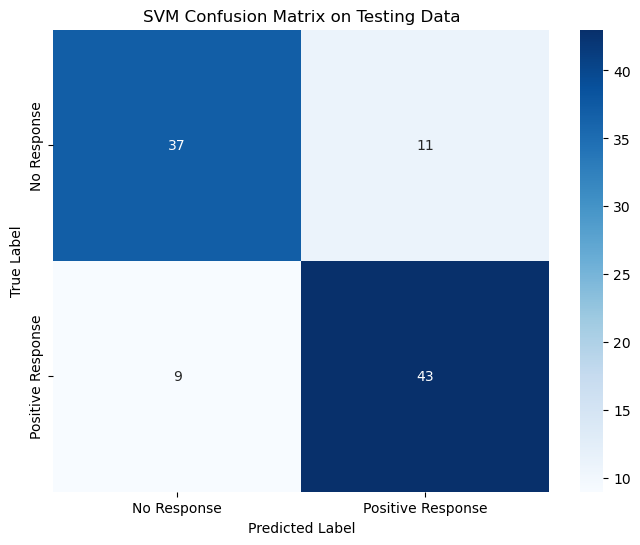

In [44]:
### Confusion matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Response', 'Positive Response'], yticklabels=['No Response', 'Positive Response'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix on Testing Data');

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        48
           1       0.80      0.83      0.81        52

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



### Parameter Tuning and Optimization

In [53]:
rbf_svm = SVC(kernel='rbf', C=1.0)
rbf_svm.fit(x_train, y_train)
rbf_pred = rbf_svm.predict(x_test)
print("rbf kernel accuracy:", accuracy_score(y_test, rbf_pred))

rbf kernel accuracy: 0.8


### Comparison and Analysis

In [58]:
### linear kernel

svc=SVC(C=1,kernel="linear")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("linear kernel accuracy is:",accuracy_score(y_test,y_pred))

linear kernel accuracy is: 0.75


In [60]:
### poly kernel

svc=SVC(C=1,kernel="poly")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("poly kernel accuracy is:",accuracy_score(y_test,y_pred))

poly kernel accuracy is: 0.7


In [61]:
### sigmoid kernel

svc=SVC(C=1,kernel="sigmoid")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("sigmoid kernel accuracy is:",accuracy_score(y_test,y_pred))

sigmoid kernel accuracy is: 0.66
